## CODIGO PARA SACAR % DE AREA DE UNA VARIABLE (EJ: ZONAS VERDES) EN CADA BARRIO

La siguiente celda de código enseña como se puede obtener la intersección de 2 mapas en formato .geojson para sacar, por ejemplo, el % de zonas verdes que hay por cada barrio de una ciudad (en este caso Valencia)

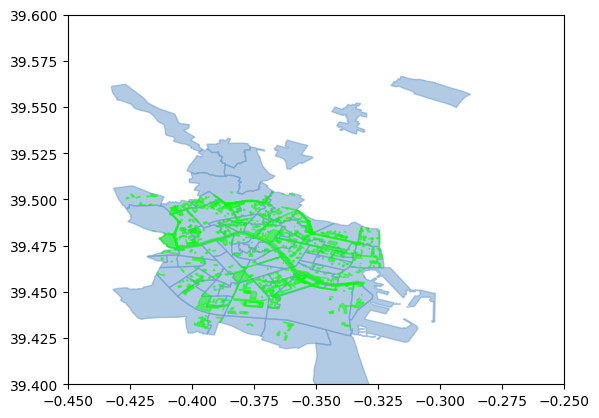

" geoplot.polyplot(merged, projection=gcrs.AlbersEqualArea(), edgecolor='green', facecolor='green', linewidth=.3,\n    figsize=(12, 8)) "

In [8]:
import json
import geopandas as gpd
import matplotlib.pyplot as plt 


import geoplot
import geoplot.crs as gcrs
import rtree
from descartes import PolygonPatch


######################################
## CARGANDO DATOS INICIALES BARRIOS ##
######################################

with open('/home/ttmam/GitHub/DATAPROJECT1/datos_ini/barris-barrios.geojson') as json_file:
    json_data = json.load(json_file)


# print(json_data.keys())


# Guardamos datos del json en una variable solo con las geometría de los polígonos, y en otra con todas las características de cada barrio (coordenadas poligono, nombre barrio, etc.)

barrios=[]
barrios_json = []
for i in range(len(json_data['features'])):
    barrios.append(json_data['features'][i]['geometry'])
    barrios_json.append(json_data['features'][i])


 
""" BLUE = '#6699cc'
fig = plt.figure() 
ax = fig.gca()
for i in range(len(barrios)):
    ax.add_patch(PolygonPatch(barrios[i], fc=BLUE, ec=BLUE, alpha=0.5, zorder=2 ))
ax.axis('scaled')
plt.show() """
 

###########################################
## CARGANDO DATOS INICIALES ZONAS VERDES ##
###########################################

with open('/home/ttmam/GitHub/DATAPROJECT1/datos_ini/zonas-verdes.geojson') as json_file2:
    json_data2 = json.load(json_file2)

# print(json_data.keys())



zonas_verdes=[]
zonas_verdes_json=[]

for i in range(len(json_data2['features'])):
    if json_data2['features'][i]['geometry'] is None:
        pass
    else:
        zonas_verdes.append(json_data2['features'][i]['geometry'])   
        zonas_verdes_json.append(json_data2['features'][i])


""" GREEN = '#00FF00'
fig = plt.figure() 
ax = fig.gca()
for i in range(len(zonas_verdes)):
    # print(i)
    ax.add_patch(PolygonPatch(zonas_verdes[i], fc=GREEN, ec=GREEN, alpha=0.5, zorder=2 ))
ax.axis('scaled')
plt.show() """



""" BLUE = '#6699cc'
GREEN = '#00FF00'
fig = plt.figure() 
ax = fig.gca()
for i in range(len(barrios)):
    ax.add_patch(PolygonPatch(barrios[i], fc=BLUE, ec=BLUE, alpha=0.5, zorder=2 ))
for i in range(len(zonas_verdes)):
    ax.add_patch(PolygonPatch(zonas_verdes[i], fc=GREEN, ec=GREEN, alpha=0.5, zorder=2 ))

# ax.axis('scaled')
ax.set_ylim([39.4, 39.6])
ax.set_xlim([-0.45,-0.25])
plt.show() """



###############################################
## CARGANDO DATOS COMO GPD PARA INTERSECCION ##
###############################################


barrios_gpd = gpd.GeoDataFrame.from_features(barrios_json)
barrios_gpd.crs = 'epsg:4326' #Aseguramos que la proyección es la adecuada para coordenadas GPS

# print(barrios_gpd)

# barrios_gpd.to_csv('ejemplobarrio.csv')

zonas_verdes_gpd = gpd.GeoDataFrame.from_features(zonas_verdes_json)
zonas_verdes_gpd.crs = 'epsg:4326' #Aseguramos que la proyección es la adecuada para coordenadas GPS


""" geoplot.polyplot(zonas_verdes_gpd, projection=gcrs.AlbersEqualArea(), edgecolor='green', facecolor='green', linewidth=.3,
    figsize=(12, 8))  """
    




## CALCULANDO INTERSECCIÓN BARRIOS CON ZONAS VERDES

merged = gpd.overlay(barrios_gpd, zonas_verdes_gpd,   how='intersection') # Calculamos la intersección de los polígonos de barrios con los de zonas verdes
merged.crs = 'epsg:4326' #Aseguramos que la proyección es la adecuada para coordenadas GPS



## GUARDANDO RESULTADO EN ARCHIVO .geojson

with open("interseccion.geojson", "w") as outfile:
    outfile.write(merged.to_json())


###############################################
## CARGANDO DATOS COMO GPD PARA INTERSECCION ##
###############################################


merged = merged.to_crs("+proj=cea +lat_ts=39.44628964870906 +lon_ts=-0.3326600366971329 +units=km") #Se proyecta sobre el plano para el cálculo adecuado del área


barrios_gpd = barrios_gpd.to_crs("+proj=cea +lat_ts=39.44628964870906 +lon_ts=-0.3326600366971329 +units=km") #Se proyecta sobre el plano para el cálculo adecuado del área


merged['areaVariable'] = merged.geometry.area

barrios_gpd['areaBarrio'] = barrios_gpd.geometry.area


merged_areas = merged.groupby('nombre')['areaVariable'].sum() # Sumamos todas las áreas verdes por barrio



barrios_gpd = barrios_gpd.merge(merged_areas, on='nombre', how='left') # Hacemos merge de la tabla Barrios con la tabla merged_areas



barrios_gpd = barrios_gpd.to_crs ('epsg:4326') #Se necesita convertir otra vez a epsg para poder tener las coordenadas GPS correctamente



barrios_gpd['per_variable'] = barrios_gpd['areaVariable']/barrios_gpd['areaBarrio'] # Obtenemos el % de zona verde por barrio


# barrios_gpd_pervariable = barrios_gpd.groupby('nombre')['per_variable'].sum()

# barrios_gpd_pervariable.to_csv('barrios_pervariable.csv')

with open("barrios_perzonaverde.geojson", "w") as outfile:
    outfile.write(barrios_gpd.to_json())





""" geoplot.polyplot(merged, projection=gcrs.AlbersEqualArea(), edgecolor='green', facecolor='green', linewidth=.3,
    figsize=(12, 8)) """

## CODIGO PARA SACAR NUMERO DE PUNTOS DE UNA VARIABLE (EJ: HOSPITALES) EN CADA BARRIO

La siguiente celda de código enseña como se puede obtener el número de puntos de una variable en formato .geojson para sacar, por ejemplo, el numero de hospitales que hay por cada barrio de una ciudad (en este caso Valencia)

In [35]:
import json
import geopandas as gpd
import matplotlib.pyplot as plt 
import numpy as np

import geoplot
import geoplot.crs as gcrs
import rtree
from descartes import PolygonPatch


######################################
## CARGANDO DATOS INICIALES BARRIOS ##
######################################

with open('/home/ttmam/GitHub/DATAPROJECT1/datos/datos_ini/barris-barrios.geojson') as json_file:
    json_data = json.load(json_file)
    
    
# print(json_data.keys())


# Guardamos datos del json en una variable solo con las geometría de los polígonos, y en otra con todas las características de cada barrio (coordenadas poligono, nombre barrio, etc.)

barrios=[]
barrios_json = []
for i in range(len(json_data['features'])):
    barrios.append(json_data['features'][i]['geometry'])
    barrios_json.append(json_data['features'][i])


""" 
BLUE = '#6699cc'
fig = plt.figure() 
ax = fig.gca()
for i in range(len(barrios)):
    ax.add_patch(PolygonPatch(barrios[i], fc=BLUE, ec=BLUE, alpha=0.5, zorder=2 ))
ax.axis('scaled')
plt.show()
 """

###########################################
## CARGANDO DATOS INICIALES ZONAS VERDES ##
###########################################

with open('/home/ttmam/GitHub/DATAPROJECT1/datos/datos_ini/hospitales.geojson') as json_file2:
    json_data2 = json.load(json_file2)

# print(json_data.keys())



hospitales=[]
hospitales_json=[]

for i in range(len(json_data2['features'])):
    if json_data2['features'][i]['geometry'] is None:
        pass
    else:
        hospitales.append(json_data2['features'][i]['geometry'])   
        hospitales_json.append(json_data2['features'][i])


""" GREEN = '#00FF00'
fig = plt.figure() 
ax = fig.gca()
for i in range(len(hospitales)):
    # print(i)
    ax.add_patch(PolygonPatch(hospitales[i], fc=GREEN, ec=GREEN, alpha=0.5, zorder=2 ))
ax.axis('scaled')
plt.show() """



""" BLUE = '#6699cc'
GREEN = '#00FF00'
fig = plt.figure() 
ax = fig.gca()
for i in range(len(barrios)):
    ax.add_patch(PolygonPatch(barrios[i], fc=BLUE, ec=BLUE, alpha=0.5, zorder=2 ))
for i in range(len(hospitales)):
    ax.add_patch(PolygonPatch(hospitales[i], fc=GREEN, ec=GREEN, alpha=0.5, zorder=2 ))

# ax.axis('scaled')
ax.set_ylim([39.4, 39.6])
ax.set_xlim([-0.45,-0.25])
plt.show() """



###############################################
## CARGANDO DATOS COMO GPD PARA INTERSECCION ##
###############################################


barrios_gpd = gpd.GeoDataFrame.from_features(barrios_json)
barrios_gpd.crs = 'epsg:4326' #Aseguramos que la proyección es la adecuada para coordenadas GPS
barrios_gpd = barrios_gpd.rename(columns ={'nombre':'nombre_barrio_new','codbarrio':'codigo_barrio_new'})


hospitales_gpd = gpd.GeoDataFrame.from_features(hospitales_json)
hospitales_gpd.crs = 'epsg:4326' #Aseguramos que la proyección es la adecuada para coordenadas GPS



""" geoplot.polyplot(hospitales_gpd, projection=gcrs.AlbersEqualArea(), edgecolor='green', facecolor='green', linewidth=.3,
    figsize=(12, 8)) """
    


## CALCULANDO INTERSECCIÓN BARRIOS CON ZONAS VERDES

merged = gpd.overlay(barrios_gpd, hospitales_gpd,   how='intersection', keep_geom_type=False) # Calculamos la intersección de los polígonos de barrios con los de zonas verdes
merged.crs = 'epsg:4326' #Aseguramos que la proyección es la adecuada para coordenadas GPS



## GUARDANDO RESULTADO EN ARCHIVO .geojson

with open("interseccion_hospitales.geojson", "w") as outfile:
    outfile.write(merged.to_json())

# merged['point_count'] = np.nan



merged_count = merged.groupby('nombre_barrio_new')['codigo_barrio_new'].count().reset_index(name="point_count") # Sumamos todas las áreas de intersección por barrio

# print(merged_count)


barrios_gpd = barrios_gpd.merge(merged_count, on='nombre_barrio_new', how='left') # Hacemos merge de la tabla Barrios con la tabla merged_areas


with open("barrios_perhospitalnew.geojson", "w") as outfile:
     outfile.write(barrios_gpd.to_json())




###############################################
## CARGANDO DATOS COMO GPD PARA INTERSECCION ##
###############################################

#*Modifcado el código de https://stackoverflow.com/questions/71359323/how-to-sum-the-number-of-entries-in-a-dataframe-that-are-located-within-a-geopan

# # do the spatial join, index right is the polygon idx values
# sjoin_gdf = gpd.sjoin(hospitales_gpd, barrios_gpd)

# # count the values with value counts
# count_dict = sjoin_gdf['index_right'].value_counts().to_dict()

# # map the count_dict back to poly_gdf as new point count column 
# # alternatively you could do a join here, but new col name is nice
# barrios_gpd['point_count'] = barrios_gpd.index.map(count_dict)

# barrios_gpd_points = barrios_gpd.groupby('nombre')['point_count'].sum()

# print(barrios_gpd_points)


